In [9]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Filter only objects having one diffusion texture
##### ℹ️ This notebook requires ShapeNetCore models in the `.shapenet/` root folder. It also requires the `statistics.parquet` file generated by `compute_statistics.py`.
This notebook downloads all the filtered objects and filter them based on the the textures they have.

In [13]:
dataset=ShapeNetCoreDataset3D()
statistics = dataset.statistics
statistics.head()

,meshCount,uvCount,diffuseCount,uvScore,valid
uid,,,,,
1004ae81238886674d44f5db04bf14b8,1,1,1,0.0,True
1005d0f6134d4afb69c93024dedae1a3,1,1,4,0.277732,False
1006be65e7bc937e9141f9b58470d646,1,1,2,0.574923,False
100715345ee54d7ae38b52b4ee9d36a3,1,1,2,0.011458,False
1007e20d5e811b308351982a6e40cf41,1,1,3,0.542284,False


In [14]:
statistics['valid'].sum()

11939

## How many OBJ files have 1 Mesh, 1 UV map and 1 diffuse texture?

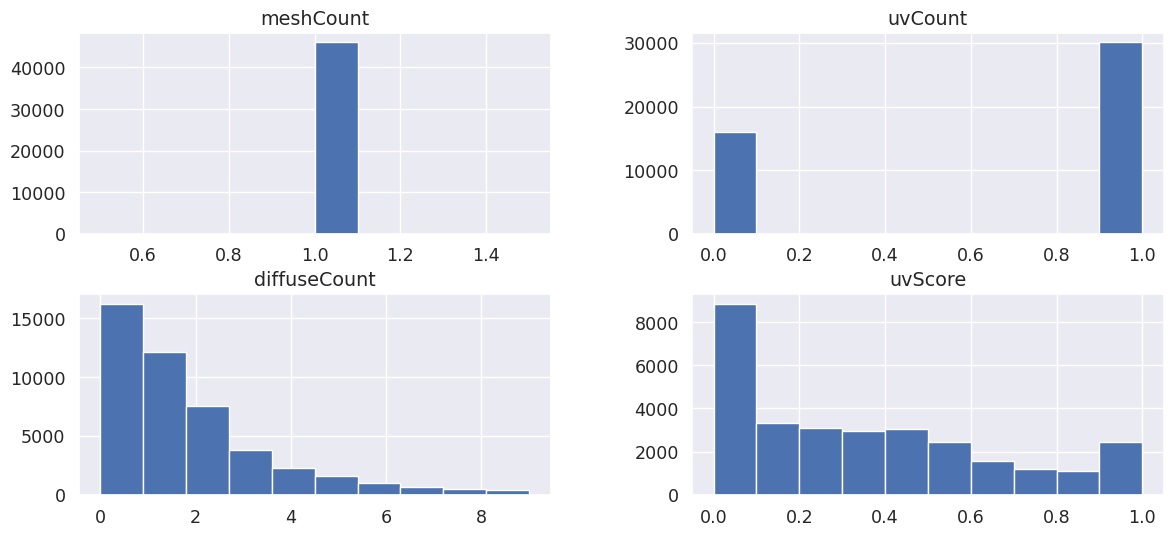

In [26]:
statistics[statistics["diffuseCount"]<10].hist(figsize=(14,6));

In [29]:
MIN_FACES, MAX_FACES = 1, 25_000
filtered_uids = statistics[
    (statistics["meshCount"] == 1)
    & (statistics["uvCount"] == 1)
    & (statistics["diffuseCount"] == 1)
].index
cprint(f"green:{len(filtered_uids)/len(statistics):.2%} of OBJs ({len(filtered_uids)}) meet the requirements")

25.07% of OBJs (12090) meet the requirements


##### 👉🏼 About $25\%$ of OBJ files contain 1 mesh, 1 UV and 1 diffuse.